<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

<ipython-input-2-849fdd275246>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
print(boston_df.shape)

(506, 14)


In [6]:
print(boston_df.describe())

       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               RM         AGE         DIS         RAD         TAX     PTRATIO  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   
std      0.702617   28.1488

From get-go, two data coulmns show interesting summeries. They are : ZN (proportion of residential land zoned for lots over 25,000 sq.ft.) with 0 for 25th, 50th percentiles. Second, CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise) with 0 for 25th, 50th and 75th percentiles. These summeries are understandable as both variables are conditional + categorical variables. First assumption would be that these coulms may not be useful in regression task such as predicting MEDV (Median value of owner-occupied homes).

Another interesing fact on the dataset is the max value of MEDV. From the original data description, it says: Variable #14 seems to be censored at 50.00 (corresponding to a median price of $50,000). Based on that, values above 50.00 may not help to predict MEDV. Let's plot the dataset and see interesting trends/stats.

For the "Median value of owner-occupied homes" provide a boxplot

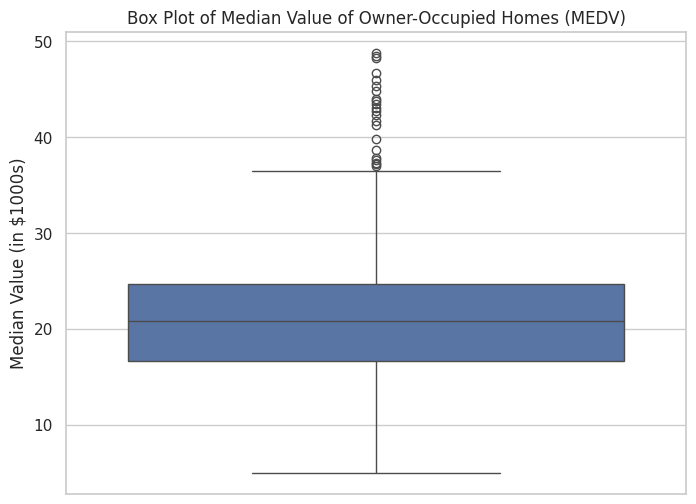

In [13]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=data['MEDV'])
plt.title('Box Plot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000s)')
plt.show()


Provide a  bar plot for the Charles river variable

<ipython-input-14-0db83886340f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=chas_counts.index, y=chas_counts.values, palette='viridis')


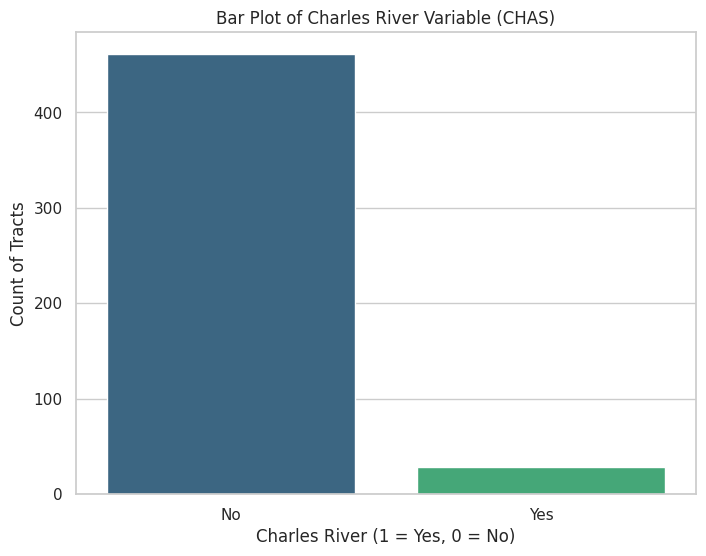

In [14]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Count the occurrences of each value in the 'CHAS' column
chas_counts = data['CHAS'].value_counts()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=chas_counts.index, y=chas_counts.values, palette='viridis')
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count of Tracts')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])  # Change x-tick labels for clarity
plt.show()


Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

<ipython-input-16-3af539cac867>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels)
<ipython-input-16-3af539cac867>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='AGE_GROUP', y='MEDV', data=data, palette='viridis')


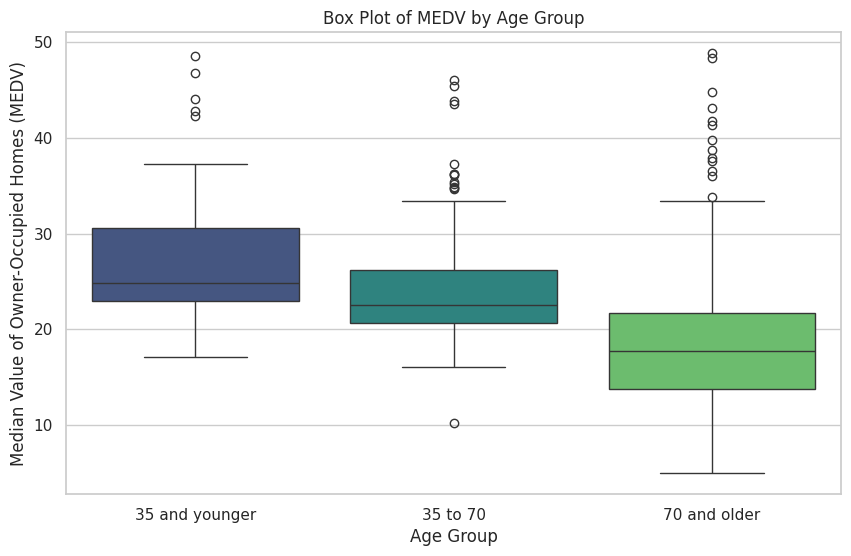

In [16]:
# Discretize the AGE variable into three groups
bins = [0, 35, 70, 100]  # Adjust the upper limit as necessary
labels = ['35 and younger', '35 to 70', '70 and older']
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels)

# Set the style of seaborn
sns.set(style='whitegrid')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='AGE_GROUP', y='MEDV', data=data, palette='viridis')
plt.title('Box Plot of MEDV by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes (MEDV)')
plt.show()


Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

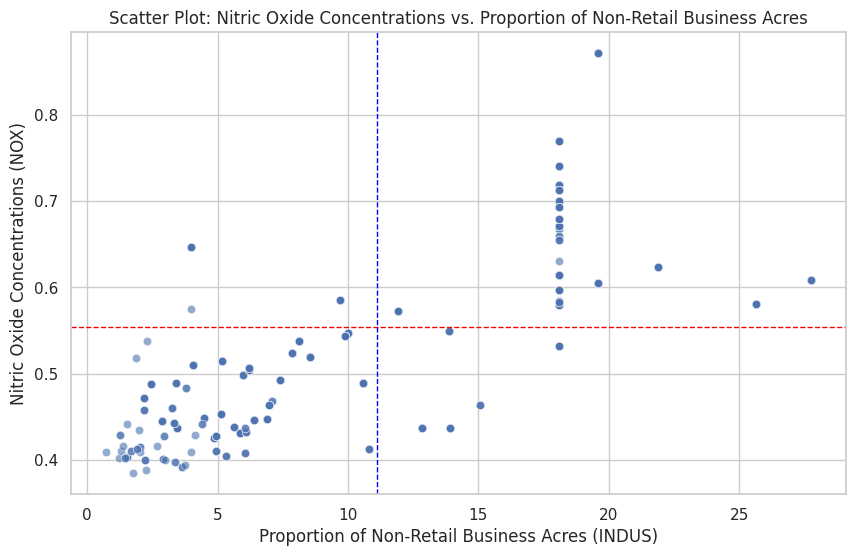

In [12]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['INDUS'], y=data['NOX'], alpha=0.6)
plt.title('Scatter Plot: Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.axhline(data['NOX'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data['INDUS'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.show()


Create a histogram for the pupil to teacher ratio variable

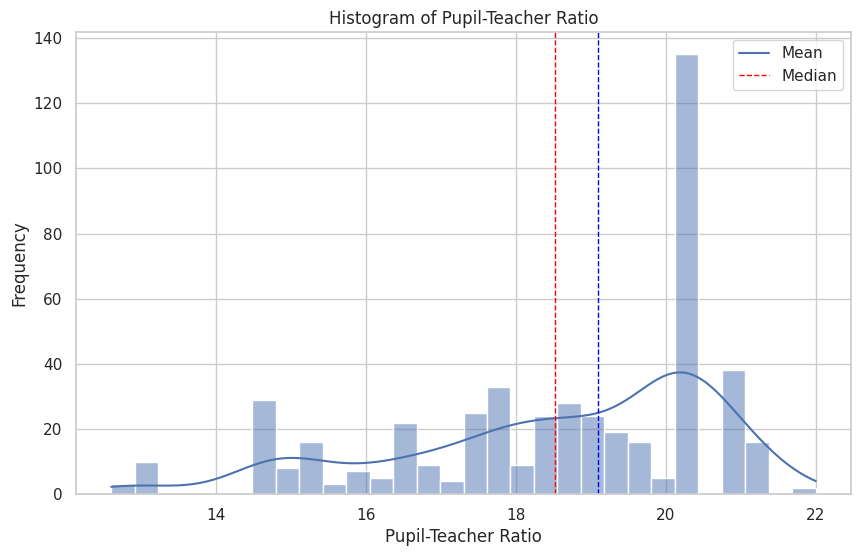

In [11]:
# Set the style of seaborn
sns.set(style='whitegrid')

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=30, kde=True)  # Using kde for the density curve
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.axvline(data['PTRATIO'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.axvline(data['PTRATIO'].median(), color='blue', linestyle='dashed', linewidth=1)
plt.legend({'Mean': data['PTRATIO'].mean(), 'Median': data['PTRATIO'].median()})
plt.show()


Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [17]:
# Separate the MEDV values based on the Charles River variable
medv_chas_1 = data[data['CHAS'] == 1]['MEDV']  # Houses bounded by the Charles River
medv_chas_0 = data[data['CHAS'] == 0]['MEDV']  # Houses not bounded by the Charles River

from scipy import stats

# Perform the independent samples t-test
t_stat, p_value = stats.ttest_ind(medv_chas_1, medv_chas_0)

# Display the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in median house values.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in median house values.")


T-statistic: 1.6571053443179937
P-value: 0.09814089320087695
Fail to reject the null hypothesis: There is no significant difference in median house values.


Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [18]:
# Create age groups based on specified ranges
bins = [0, 35, 70, 100]  # Adjust the upper limit as necessary
labels = ['35 and younger', '35 to 70', '70 and older']
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels)

from scipy import stats

# Perform ANOVA
anova_result = stats.f_oneway(
    data[data['AGE_GROUP'] == '35 and younger']['MEDV'],
    data[data['AGE_GROUP'] == '35 to 70']['MEDV'],
    data[data['AGE_GROUP'] == '70 and older']['MEDV']
)

# Display the results
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')

from scipy import stats

# Perform ANOVA
anova_result = stats.f_oneway(
    data[data['AGE_GROUP'] == '35 and younger']['MEDV'],
    data[data['AGE_GROUP'] == '35 to 70']['MEDV'],
    data[data['AGE_GROUP'] == '70 and older']['MEDV']
)

# Display the results
print(f'F-statistic: {anova_result.statistic}')
print(f'P-value: {anova_result.pvalue}')



<ipython-input-18-a677a15b5c3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AGE_GROUP'] = pd.cut(data['AGE'], bins=bins, labels=labels)


F-statistic: 62.52526742755417
P-value: 6.770160113149702e-25
F-statistic: 62.52526742755417
P-value: 6.770160113149702e-25


Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [27]:
# Pearson correlation between NOX and INDUS
nox_indus_corr = data['NOX'].corr(data['INDUS'])
print('Pearson correlation between NOX and INDUS:', nox_indus_corr)

Pearson correlation between NOX and INDUS: 0.7651551391191304


|r| close to 1: Indicates a strong relationship (positive if r is positive, negative if r is negative).

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [33]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (assuming df is the DataFrame with Boston housing data)
X = data[['DIS']]  # DIS is the feature (weighted distance to employment centers)
y = data['MEDV']   # MEDV is the target (median value of homes)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Get the coefficient and intercept
intercept = model.intercept_
dis_coef = model.coef_[0]

print(f"Intercept: {intercept}")
print(f"Coefficient for DIS: {dis_coef}")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Intercept: 17.113376916085542
Coefficient for DIS: 1.2840565251561022
Mean Squared Error: 42.767145080158606
R-squared: 0.16282967425356665


If the coefficient is positive, it suggests that homes further from employment centers have higher values.